# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives


**Problem Statement**:

E-news Express, an online news portal, has identified that their current webpage design may not be adequately engaging its visitors, potentially leading to a decline in new subscriptions. The challenge is to understand the behavior and interests of the users in relation to the design of the landing page, and to determine if a newly designed landing page could lead to increased user engagement and higher conversion (subscription) rates.

**Business Context:**

Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.

**Objectives**:

1. **Landing Page Effectiveness**: Determine if the newly designed landing page is more effective in terms of user engagement by comparing the time users spend on the new landing page versus the existing one.

2. **Conversion Rate Analysis**: Analyze if the conversion rate (i.e., the rate at which visitors subscribe) for the new landing page is higher than that of the old page.

3. **Language Preference Impact**: Investigate if the conversion status of a user (whether they subscribe or not) is influenced by their preferred language.

4. **Language-based Time Analysis**: Assess if the time users spend on the new landing page is consistent across different language preferences.

To achieve these objectives, an experiment was set up where 100 users were randomly selected and divided into two equal groups: one viewing the existing landing page (control) and the other viewing the new landing page (treatment). Statistical evaluations were conducted on the data from the experiment using a 5% significance threshold, focusing on the specific metrics outlined below:

**Data Dictionary**:

**`user_id`**: Unique user ID of the person visiting the website

**`group`**: Whether the user belongs to the first group (control) or the second group (treatment)

**`landing_page`**: Whether the landing page is new or old

**`time_spent_on_the_page`**: Time (in minutes) user spent on the landing page

**`converted`**: Whether the user gets converted to a subscriber of the news portal or not

**`language_preferred`**: User's chosen language to view the landing page


## Import all the necessary libraries

In [121]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the Data into a DataFrame

In [123]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Business Statistics/Project2/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [124]:
# returns the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [125]:
# view the shape of the dataset
print("There are", df.shape[0], "rows and", df.shape[1], "columns in the dataset.")

There are 100 rows and 6 columns in the dataset.


In [126]:
# check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


Observations:

* **`user_id`**: This column contains integer values (int64).

* **`group`**, **`landing_page`**, **`converted`**, and **`language_preferred`**: All these columns have the data type object, which typically indicates that they contain string (text) values.

* **`time_spent_on_the_page`**: This column contains floating-point numbers (float64), representing the time users spent on the page.

There are no missing values in any of the columns, as indicated by the "100 non-null".

In [127]:
# statistical summary of numerical and categorical variables
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:

**User ID**: The `user_id` column doesn't have any duplicates, which is a good sign. Each user's behavior is captured once in the experiment, ensuring the integrity of the experimental data.

**Balanced Experiment Groups**:
The experiment seems to be well-balanced in terms of the number of users exposed to each landing page variant (old and new). Both the `group` (control and treatment) and `landing_page` (old and new) columns show an even split of 50 users each. This balanced setup is crucial for a fair comparison in A/B testing experiments.

**User Engagement Time:** On average, users spend around 5.38 minutes on the `landing page`, with a wide range of time spent. Some users spend as little as 0.19 minutes (about 11 seconds), while others spend as much as 10.71 minutes. This variability suggests diverse user behaviors and engagements with the landing page content.

**Conversion Distribution**:
The dataset suggests that the conversion rate is slightly in favor of users converting. With 54 users out of 100 marked as "yes" for conversion, the conversion rate is 54%.

**Language Preference:** There are 3 unique languages with Spanish being the most preferred language among users.

In [128]:
# Checking for missing values in the data by priting the sum of null values for each column
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

Observations:

There are no null values in this dataset.

In [129]:
# check the total number of duplicated rows in the entire dataframe
df.duplicated().sum()

0

Observations:

There are no duplicated values in the dataset.

### Univariate Analysis
Analize all variables individually:

1. **`user_id`**: Time spent on the page

2. **`group`**:Whether the user belongs to the first group (control) or the second group (treatment)

3. **`landing_page`**: Whether the landing page is new or old

4. **`time_spent_on_the_page`**: Time (in minutes) user spent on the landing page

5. **`converted`**: Whether the user gets converted to a subscriber of the news portal or not

6. **`language_preferred`**: User's chosen language to view the landing page


#### `1. User ID`

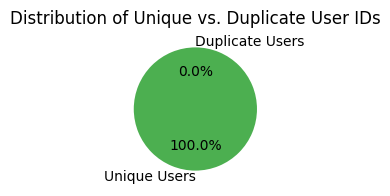

In [162]:
# Checking the number of unique user_ids and potential duplicates
unique_users = df['user_id'].nunique()
duplicate_users = df.shape[0] - unique_users

# Plotting the count of unique users vs. potential duplicates
labels = ['Unique Users', 'Duplicate Users']
sizes = [unique_users, duplicate_users]

plt.figure(figsize=(4, 2))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FFC107'])
plt.title('Distribution of Unique vs. Duplicate User IDs');

Observations:

This is just a graphical representation of user IDs being unique with no duplicates. Does not provide additional insights about this variable.

#### `2. Group`

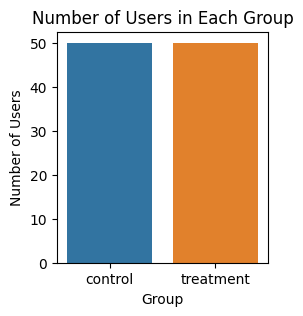

In [167]:
# Bar Plot for the distribution of users in each group
plt.figure(figsize=(6, 3))

# Subplot for the bar plot
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='group')
plt.title('Number of Users in Each Group')
plt.ylabel('Number of Users')
plt.xlabel('Group')
plt.show()

Observations:

Bar plot representing a balanced experimental set up with an equal number of users belonging to each group (control vs. treatment).

#### `3. Landing Page`

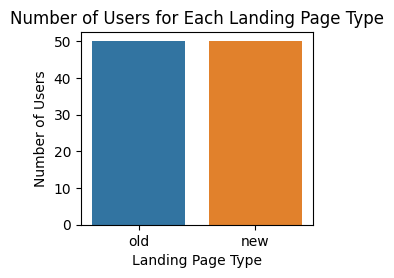

In [171]:
# Bar Plot for the distribution of users based on landing page type
plt.figure(figsize=(3, 2.5))

# Subplot for the bar plot
sns.countplot(data=df, x='landing_page')
plt.title('Number of Users for Each Landing Page Type')
plt.ylabel('Number of Users')
plt.xlabel('Landing Page Type')
plt.show()

Observations:

The bar plot depicts an even distribution of users according to the landing page version they accessed (either old or new) which is the same as control vs treatment group.



#### `4. Time Spent on Page`

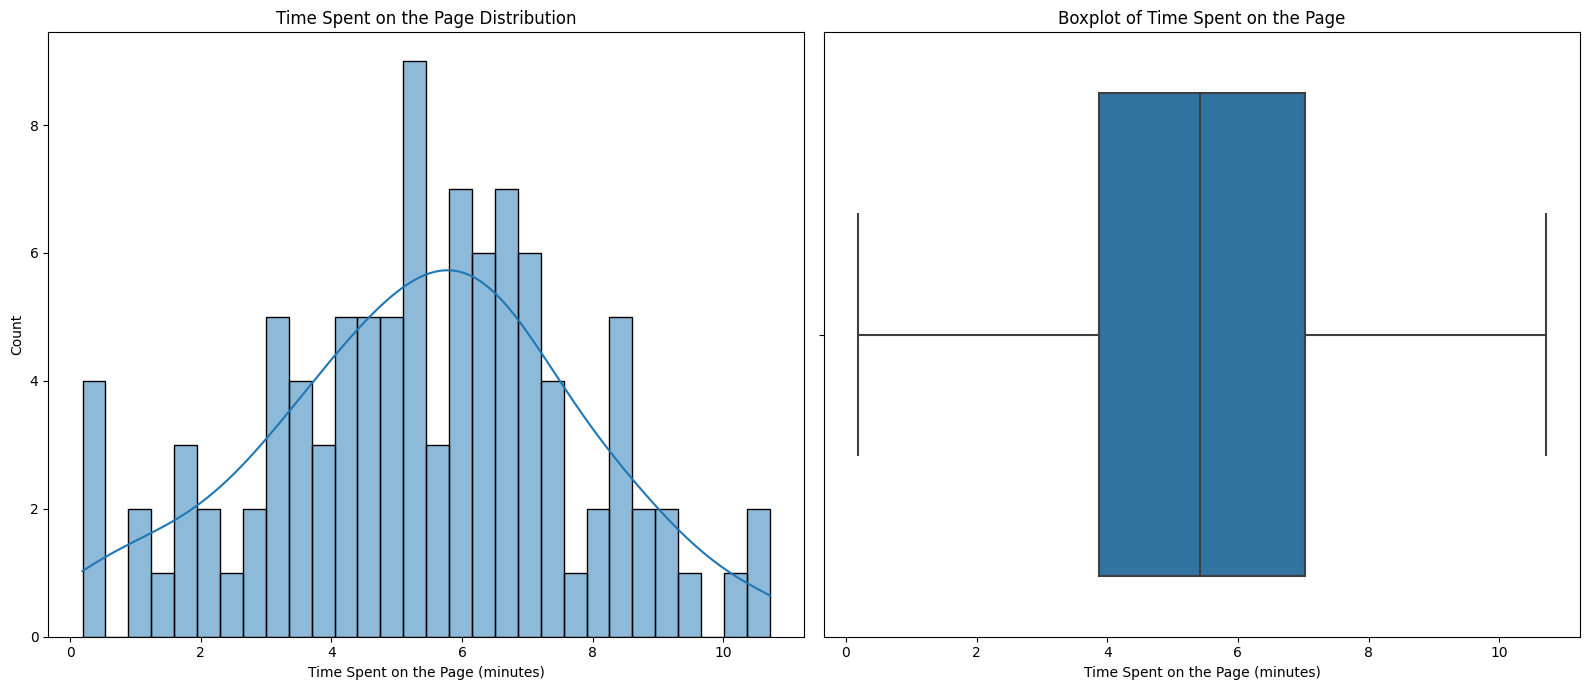

In [186]:
# Setting the figure size and creating subplots
plt.figure(figsize=(16, 7))

# First plot: Histogram visualizing the frequency distribution of time spent on the page
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.histplot(df['time_spent_on_the_page'], bins=30, kde=True)
plt.title('Time Spent on the Page Distribution')
plt.xlabel('Time Spent on the Page (minutes)')

# Second plot: Boxplot summary of the central tendency, variability, and skewness of the time spent on the page distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.boxplot(data=df, x='time_spent_on_the_page', whis=1.5)
plt.title('Boxplot of Time Spent on the Page')
plt.xlabel('Time Spent on the Page (minutes)')

plt.tight_layout()
plt.show()

Observations:

**Histogram:**

* Roughly bell-shaped, suggesting that the time spent on the page follows a normal distribution, with most users spending an avarage amount of time on the page.
* The peak of KDE indicating the mode (~5.4) of the distribution (time duration most frequently observed) and the overall wide range of time (.19 to 10.71 mins) users spent on page.

**Boxplot:**
* Central line: median the same as mean (5.4)
* The edges of box: Q1 and Q3 quartiles show a short box, indicating a narrow range of the middle 50% of the data.
* Long wiskers: indicating a wide range of the data. There are no points outside the wiskers so there are no outliers.


#### `5. Converted`

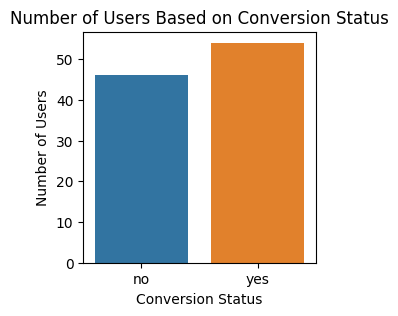

In [175]:
# Bar Plot for the distribution of users based on conversion status
plt.figure(figsize=(3, 3))

# Subplot for the bar plot
sns.countplot(data=df, x='converted')
plt.title('Number of Users Based on Conversion Status')
plt.ylabel('Number of Users')
plt.xlabel('Conversion Status')
plt.show()

Observations:

* The overall conversion rate in the experiment is above 50%. This suggests that, on the whole, more than half of the users were convinced to take action on the landing page they viewed.

Segmented analysis of other variables, such as user's preferred language or time spent on the page, and page type need to be investigated to understand factors that influenced the overall conversion rate.



#### `6. Language Preferred`

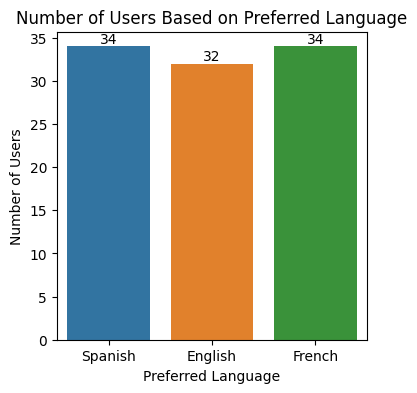

In [182]:
# Bar Plot for the distribution of users based on their preferred language
plt.figure(figsize=(4, 4))

# Create the bar plot
ax = sns.countplot(data=df, x='language_preferred')

# Set the title and labels
plt.title('Number of Users Based on Preferred Language')
plt.ylabel('Number of Users')
plt.xlabel('Preferred Language')

# Display the value counts on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Observations:
* While the initial data analysis suggested a higher preference for Spanish, this graph shows an even distribution of users between Spanish and French as their preferred languages. This discrepancy highlights the importance of visually inspecting the data. It also highlights potential errors in data recording, processing, or reading to be re-examined.    
* Otherwise,the visualization indicates that the platform caters to a user base with an identical preference for Spanish and French, and a nearly similar count for English users.
* The even distribution of language preferences among the platform's user base suggests that the content or features targeted to these languages need equal considerations.

### Bivariate Analysis

1. Landing page vs Time spent on the page
2. Conversion status vs Time spent on the page
3. Language preferred vs Time spent on the page


#### `1. Landing page vs Time spent on the page`

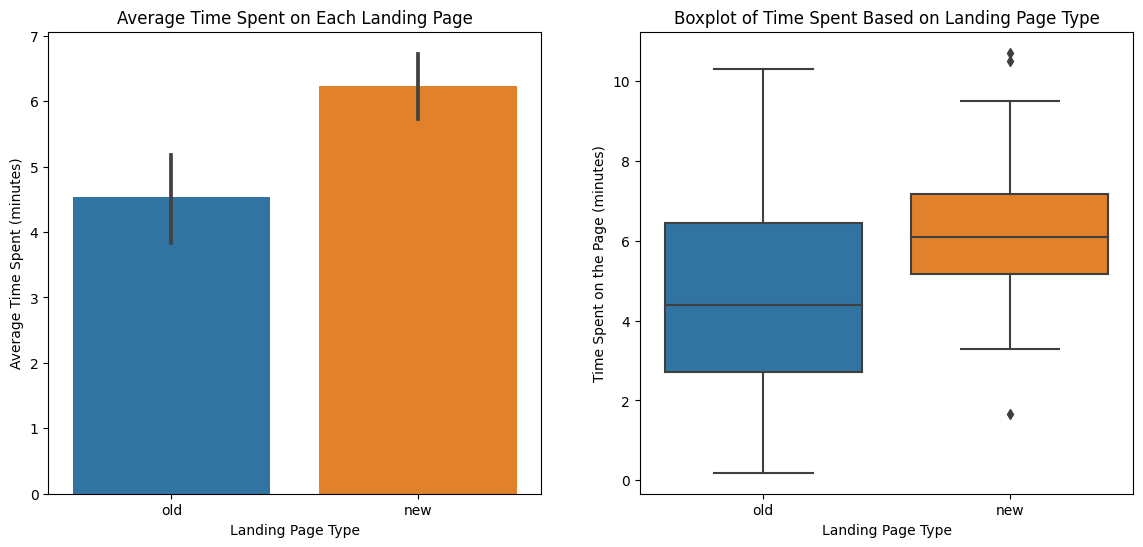

In [184]:
# Setting the figure size and creating subplots
plt.figure(figsize=(14, 6))

# First plot: Bar plot visualizing the average time spent on each landing page
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.barplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.title('Average Time Spent on Each Landing Page')
plt.xlabel('Landing Page Type')
plt.ylabel('Average Time Spent (minutes)')

# Second plot: Boxplot showing the distribution of time spent on each landing page
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.title('Boxplot of Time Spent Based on Landing Page Type')
plt.xlabel('Landing Page Type')
plt.ylabel('Time Spent on the Page (minutes)')

plt.show()

Observations:

**Bar Plot**:
* Displays the avarage time spent on each type of landing page (old or new). It shows that the users, on average, spend more time on the new landing page. Even though more analysis is needed to find out weather time spent on the new page is languge use specific or weather this leads to higher conversion status we observed earlier, this is still an important observation and the basis of the alternative hypothesis of the first objective question.  

**Box Plot**:
* The time users spend on the new landing page version has data points outside the whiskers (outliers) indicating inconsistent user behavior or specific issues affecting only this subset of users.
* The new landing page type box is notably thinner, meaning that the middle 50% of users have a more consistent time range they spend on this page compared to the old page.
* A higher placement of the box suggests that the median time (and the mean time) spent on the new landing page is greater.

#### `2. Conversion status vs Time spent on the page`


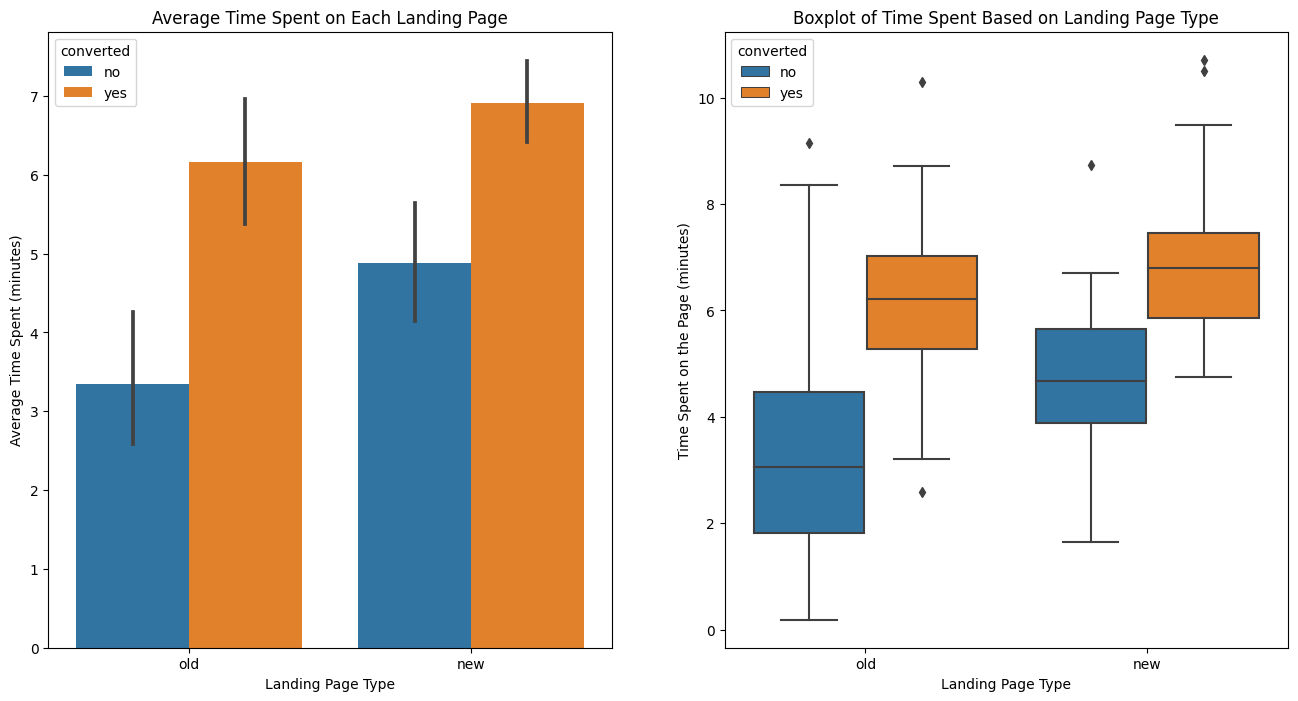

In [189]:
# Setting the figure size and creating subplots
plt.figure(figsize=(16, 8))

# First plot: Bar plot visualizing the average time spent on each landing page categorized by whether the user converted or not
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.barplot(data=df, x='landing_page', y='time_spent_on_the_page', hue="converted")
plt.title('Average Time Spent on Each Landing Page')
plt.xlabel('Landing Page Type')
plt.ylabel('Average Time Spent (minutes)')


# Second plot: Boxplot showing the distribution of time spent on each landing page groupped by whether the user converted or not
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', hue="converted")
plt.title('Boxplot of Time Spent Based on Landing Page Type')
plt.xlabel('Landing Page Type')
plt.ylabel('Time Spent on the Page (minutes)')

plt.show()

Observations:

This set of graphs parallels the earlier "Landing page vs. Time spent on the page". However, it provides an additional level of differentiation by showcasing the time spent based on a user's conversion status in order to further investigate weather time spent within each landing page is correlated to conversion rates for that group.

**Bar Plot**:
* The bar plot highlights the differences in the average time spent on each landing page, categorized by by their conversion status.
* For both old and new landing pages, converted users generally spend more time on the site than those who didn't convert.
This pattern suggests a relationship between the time users spend on a page and their likelihood to convert. This observation is noteworthy and provides foundational support for the alternative hypothesis in the second objective question.

**Box Plot**:
* For the new landing page, converted users seem to have a consistent range of time spent, with a few outliers. In contrast, non-converted users exhibit a broader range of time spent, indicating varied user engagement.
* On the old landing page, the difference in time spent between converted and non-converted users is more pronounced than on the new page, but the trend of converted users spending more time remains.
* The normal distribution of time spent by converted users might suggest that there's a typical user journey or experience that leads to conversion.
* The appearance of outliers on all groups and subgroups is intriguing.



#### `3. Language preferred vs Time spent on the page`

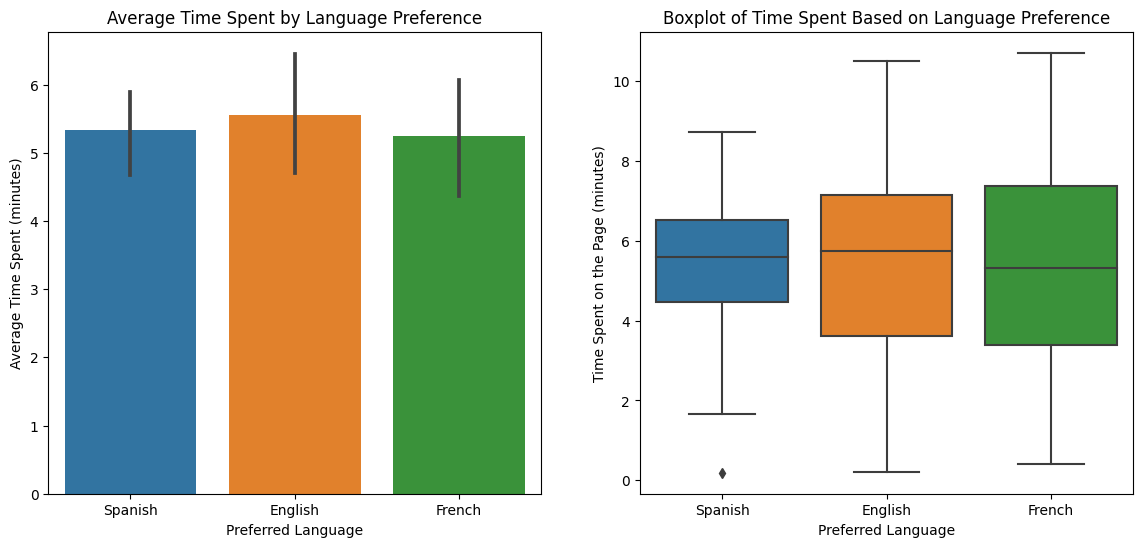

In [190]:
# Setting the figure size and creating subplots
plt.figure(figsize=(14, 6))

# First plot: Bar plot visualizing the average time spent based on language preference
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.barplot(data=df, x='language_preferred', y='time_spent_on_the_page')
plt.title('Average Time Spent by Language Preference')
plt.xlabel('Preferred Language')
plt.ylabel('Average Time Spent (minutes)')

# Second plot: Boxplot showing the distribution of time spent based on language preference
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page')
plt.title('Boxplot of Time Spent Based on Language Preference')
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent on the Page (minutes)')

plt.show()

Observations:

**Bar plot**:
* The bar plot shows uniform engagement across all languages. This further adds to the generally consistent experience across diffrent languages users we have already observed.
* The even language prefrence distribution and the similar average time spent on the page, suggests that the content or design of the landing page is uniformly engaging across different languages.

**Box plot**:
* The varying thickness of the boxes in the box plot indicates different levels of variability in time spent on the page within each language group.   

Further segmentation analysis and statistical testing is needed to draw inference.

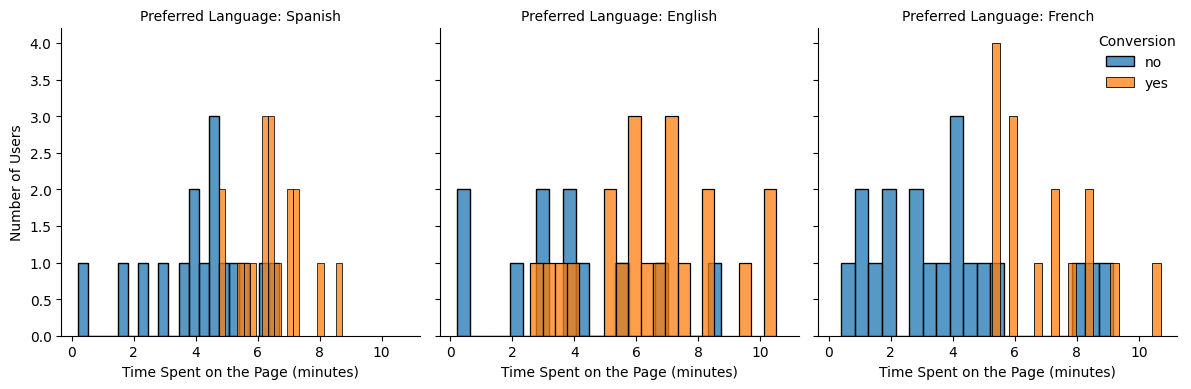

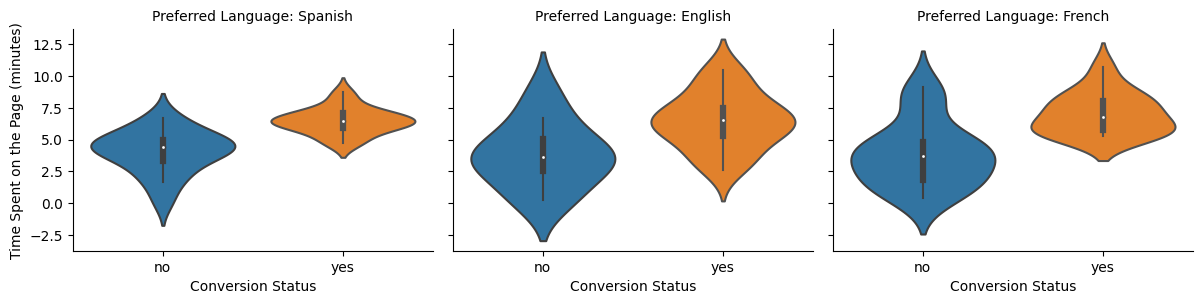

In [192]:
# Histogram: Visualizing the correlation between time spent on the page and conversion rate for each language group
g = sns.FacetGrid(df, col="language_preferred", hue="converted", height=4, aspect=1)

g.map(sns.histplot, 'time_spent_on_the_page', bins=20)

g.set_axis_labels("Time Spent on the Page (minutes)", "Number of Users")
g.set_titles("Preferred Language: {col_name}")

g.add_legend(title="Conversion", bbox_to_anchor=(0.93, .83))
plt.show()

# Using a FacetGrid for violin plots
g = sns.FacetGrid(df, col="language_preferred", hue="converted", height=4, aspect=1)

# Plotting the violin plots
g.map(sns.violinplot, "converted", "time_spent_on_the_page", order=["no", "yes"])

# Setting axis labels and subplot titles
g.set_axis_labels("Conversion Status", "Time Spent on the Page (minutes)")
g.set_titles("Preferred Language: {col_name}")

# Providing an overall title for the figure
plt.subplots_adjust(top=0.7)

plt.show()

Observations:

**Histogram:**
* Across all three preferred languages, it's evident that users who converted (status "yes") generally spent more time on the page compared to those who didn't convert.
* The number of users who spent a very short duration (less than 2.5 minutes) on the page without converting is significant for all three languages, indicating that there might be an initial drop-off or bounce rate.


**Violin Plot:**
* The thick section of the violin plot, which represents a higher density of data points, further emphasizes that converted users tend to spend more time on the page.
* The white dot, which represents the median, is consistently higher for converted users across all languages.
* The spread (width) of the violin plot for non-converted users is wider at shorter durations of time.

While there are some varying patterns within the diffrent language groups, the conversion status seems to be only related to the time spent on the landing page and not the user's preferred languange .


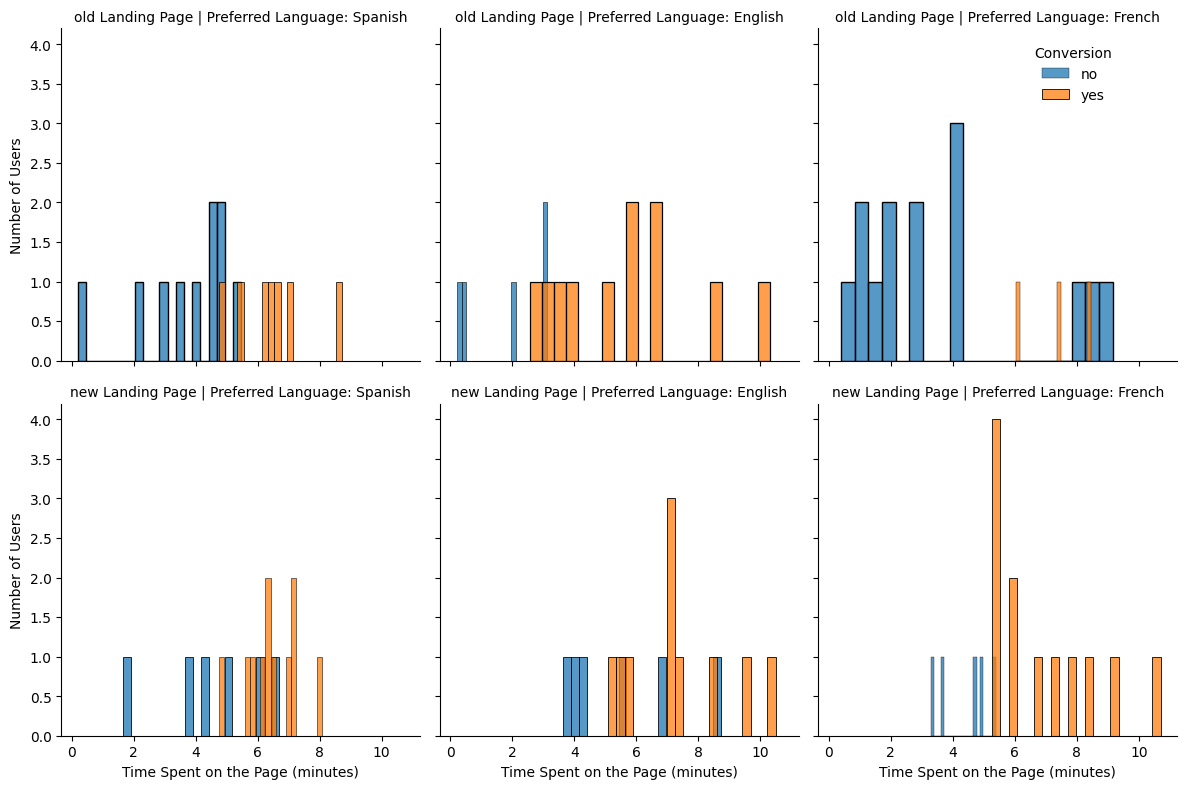

In [194]:
# Histogram: Visualizing the correlation between time spent on the page and conversion rate for each language
# Separated by landing page
g = sns.FacetGrid(df, col="language_preferred", row="landing_page", hue="converted", height=4, aspect=1)
g.map(sns.histplot, 'time_spent_on_the_page', bins=20)

# Setting axis labels, custom titles for rows and columns
g.set_axis_labels("Time Spent on the Page (minutes)", "Number of Users")
g.set_titles(row_template="{row_name} Landing Page", col_template="Preferred Language: {col_name}")

# Adding the legend and adjusting its position
g.add_legend(title="Conversion", bbox_to_anchor=(0.88, .90))

plt.show()

Observations:

Across both the old and new landing pages, users who converted generally spent more time on the page compared to users who did not convert. This trend is consistent regardless of the user's preferred language.

**Landing Page Variation**:

* For the `old landing page`, users tend to spend a variable amount of time regardless of their preferred language. However, there seems to be a slightly more pronounced distribution for those who converted.
* For the `new landing page`, the trend remains consistent across languages where those who converted generally spent more time than those who didn't.

**Language Preference:**

* Across all languages, users who converted generally spent more time on the page.
* This trend is consistent across both old and new landing pages, further strengthening the idea that engagement plays a crucial role in conversion.

To further solidify these observations and insights hypothesis testing is necessary.




## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

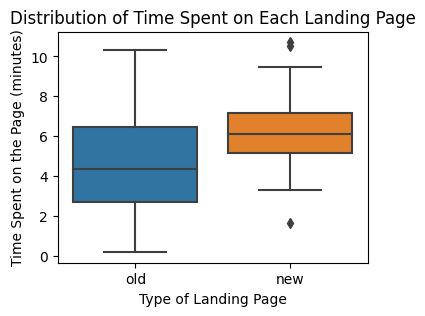

In [195]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(4,3))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)

plt.title("Distribution of Time Spent on Each Landing Page")
plt.xlabel("Type of Landing Page")
plt.ylabel("Time Spent on the Page (minutes)")

plt.show()

### Step 1: Define the null and alternate hypotheses

𝐻0
 : The mean time spent by users on the new landing page is equal to the mean time spent on the existing (old) landing page.

𝐻𝑎
 : he mean time spent by users on the new landing page is greater than the mean time spent on the existing (old) landing page.




### Step 2: Select Appropriate test

This is a one-tailed (right-tailed) test concerning two population means from two independent populations. The population standard deviations are unknown. Based on this information, a **two-sample independent t-test** is the appropriate test.

### Step 3: Decide the significance level

As given in the problem statement, we select  𝛼=0.05 .

### Step 4: Collect and prepare data

In [142]:
# create subsetted data frame for new landing page users
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [143]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


Based on the sample standard deviations of the two groups, decide whether the population standard deviations can be assumed to be equal or unequal.

### Step 5: Calculate the p-value

In [144]:
# Perform a two-sample independent t-test and determine the p-value
from scipy.stats import ttest_ind

test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [145]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

There's significant evidence to suggest that users spend more time on the new landing page than the old one.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

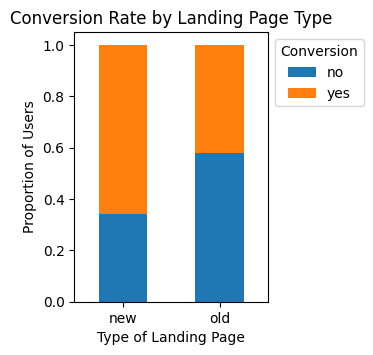

In [198]:
# complete the code to visually compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(2.5,3.5),stacked=True)
plt.legend()

plt.title("Conversion Rate by Landing Page Type")
plt.xlabel("Type of Landing Page")
plt.ylabel("Proportion of Users")
plt.legend(title="Conversion", loc="upper left", bbox_to_anchor=(1, 1))

plt.xticks(rotation=0)
plt.show()

Observations:

The conversion rate for the new page users is higher than the old page users.
However, a statistical assessment is needed to determine the significance of this observation within a specified confidence interval

### Step 1: Define the null and alternate hypotheses

𝐻0
 : The conversion rate for users on the new landing page is equal to the conversion rate for users on the existing (old) landing page.

𝐻𝑎
 : The conversion rate for users on the new landing page is greater than the conversion rate for users on the existing (old) landing page.

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. Based on this information, a **two proportion z-test** is appropriate.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [147]:
# calculate the number of converted users in the treatment and control groups
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']

#total number of users in the treatment and control groups
n_treatment = df.group.value_counts()['treatment']
n_control = df.group.value_counts()['control']

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [148]:
# Perform a two-proportion z-test and determine the p-value
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')

print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [149]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


This suggests that the observed difference in conversion rates between the two landing pages is statistically significant and is not due to random chance.

### Step 7:  Draw inference

There is enough statistical evidence to suggest that the new landing page leads to a higher conversion rate than the old landing page.


**Conversion Improvement**: The company's decision to test a new landing page seems validated. Users exposed to the new landing page are converting at a statistically significant higher rate than those exposed to the old landing page.

**Implementation Recommendation**: Given the results, the company might consider rolling out the new landing page to more users or even replacing the old one entirely. This change could lead to an increase in overall subscriptions.

**Further Exploration**: Before making extensive changes, the company might want to understand why the new landing page is more effective. Is it due to clearer messaging, better design, or some other factors? This understanding can guide future designs and decisions.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

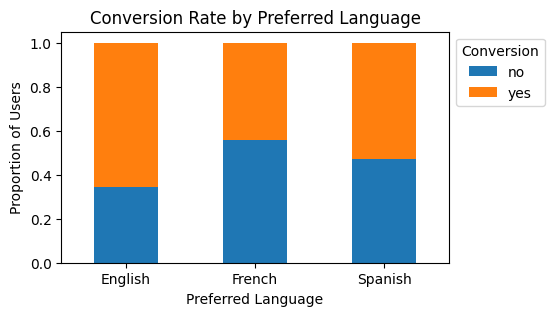

In [199]:
# Bar Chart: Visualizing the conversion status based on preferred language
conversion_by_language = pd.crosstab(df['language_preferred'], df['converted'], normalize='index')
conversion_by_language.plot(kind="bar", figsize=(5, 3), stacked=True)

plt.title("Conversion Rate by Preferred Language")
plt.ylabel("Proportion of Users")
plt.xlabel("Preferred Language")
plt.legend(title="Conversion", loc="upper left", bbox_to_anchor=(1, 1))

plt.xticks(rotation=0)
plt.show()

Observations:

English users exhibit the highest conversion rate on the new landing page. However, a statistical assessment is needed to determine the significance of this observation within a specified confidence interval.

### Step 1: Define the null and alternate hypotheses

𝐻0
 : Conversion status and preferred language are independent of each other.

𝐻𝑎
 : Conversion status and preferred language are related (or dependent on each other)

### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. Based on this information, a **chi-square test** is appropriate.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [151]:
# Create contingency table for the converted and language_preferred variables
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [152]:
# Perform a chi-squared test for independence and determine the p-value
from scipy.stats import chi2_contingency

chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)

The p-value is 0.2129888748754345


Suggests that the observed relationship between conversion status and preferred language could have occurred by random chance.

### Step 6: Compare the p-value with $\alpha$

In [153]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


As the p-value is greater than α,  we don't reject the null hypothesis. This indicates that the data doesn't provide strong enough evidence to say that the conversion status is dependent on the preferred language.

### Step 7:  Draw inference

The results suggest that the conversion status is independent of the preferred language. This means that regardless of the language preference, the likelihood of a user converting (becoming a subscriber) is roughly the same.

**Language Neutrality**: The conversion to a subscriber is not influenced by the user's language preference. This might indicate that the quality of content or the user experience is consistent across all language versions of the landing page.

**Broad Reach**: The content appeals to a broad audience, irrespective of their language preference. The company seems to have done a good job localizing their content for different language speakers.

**Future Strategy**: Given that language doesn't significantly impact conversion rates, the company might focus on other factors to improve conversions. However, they should continue to ensure that localized content maintains its quality and relevance.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [154]:
# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

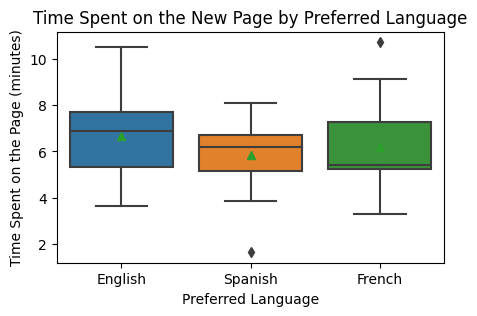

In [200]:
# Create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

# Boxplot: Visualizing the time spent on the new page for different language users
plt.figure(figsize=(5, 3))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', showmeans=True, data=df_new)

plt.title('Time Spent on the New Page by Preferred Language')
plt.ylabel('Time Spent on the Page (minutes)')
plt.xlabel('Preferred Language')

plt.show()

Observations:

* For users who viewed the new landing page, the median time spent seems to vary based on their preferred language, however the mean (indicated by the small diamond inside the box) is more uniform.

Further statistical tests can validate if the differences observed among the language groups are significant.

In [156]:
# calculate the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

𝐻0
 : The mean time spent on the new landing page is the same for all language prefrences.

𝐻𝑎
 : The mean time spent on the new landing differs from the others for at least one group.

### Step 2: Select Appropriate test

This is a problem, concerning three population means. Based on this information, the appropriate test to compare the three population means is a **one-way ANOVA test**. provided normality and homogeneity of variance assumptions are verified through Shapiro-Wilk's test and Levene's test, respectively.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [157]:
# create new subsets for the time spent on the new page for each preferred language
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']

#### Test for Normality

**Shapiro-Wilk’s test:**

𝐻0:
  The data (time spent on the new page) follows a normal distribution.

𝐻𝑎:
  The data does not follow a normal distribution.

In [158]:
# Importing the required function
from scipy.stats import shapiro

# Shapiro-Wilk's test for English speakers
w_english, p_value_english = shapiro(time_spent_English)
print('The p-value for English speakers is', p_value_english)

# Shapiro-Wilk's test for French speakers
w_french, p_value_french = shapiro(time_spent_French)
print('The p-value for French speakers is', p_value_french)

# Shapiro-Wilk's test for Spanish speakers
w_spanish, p_value_spanish = shapiro(time_spent_Spanish)
print('The p-value for Spanish speakers is', p_value_spanish)

The p-value for English speakers is 0.8863451480865479
The p-value for French speakers is 0.3213688135147095
The p-value for Spanish speakers is 0.09006832540035248


For all three language groups, the p-value is greater than the significance level, meaning that the data does not show significant deviation from a normal distribution. This means we can proceed with the ANOVA test.

#### Test for Homogeneity of Variances

**Levene's Test:**

𝐻0
 : All groups (language preference) have equal variances for the time spent on the new page.

𝐻𝑎
 : At least one group has a variance that is different from the others.


In [159]:
from scipy.stats import levene

# Perform Levene's test
stat, p_value = levene(time_spent_English, time_spent_French, time_spent_Spanish)

print('The p-value from Levene\'s test is:', p_value)

The p-value from Levene's test is: 0.46711357711340173


The p-value is greater than the significance leve, meaning we fail to reject the null hypothesis of the Levene's test.

This means we can proceed with the ANOVA test.

### Step 5: Calculate the p-value

In [160]:
# Perform a one-way ANOVA test and determine the p-value
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [161]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


This means that the data doesn't provide strong evidence to suggest a significant difference in mean time spent on the new landing page among the different language groups.

### Step 7:  Draw inference

There is no significant difference in the average time users spend on the new landing page based on their language preference. This indicates that the new landing page is equally engaging or attractive across all language preferences.

**Uniform Experience**: The new landing page seems to offer a universally consistent experience across different languages. It means the localization or translation of content for different languages is effective, and none of the language versions is notably better or worse than the others in terms of user engagement.

**Generalizability**: If the goal is to roll out the new landing page to a broader audience, it's promising to see that language preference doesn't significantly affect the time spent on the page. It suggests that the new design's appeal is relatively universal.

**Future Considerations**: Even though language doesn't significantly impact time spent, it's worth exploring other variables that might. For instance, does the page load time differ between languages, or are there cultural nuances in design preferences that haven't been captured?

## Conclusion and Business Recommendations

**Conclusions**:

* User Engagement:
The new landing page appears to be more engaging to users, with them spending more time on average than on the old page. This suggests that the new design or content might be more appealing or user-friendly.
* Conversion Rates:
Users on the new landing page are more likely to convert (i.e., become subscribers) than those on the old landing page. This is a strong indicator of the effectiveness of the new design in terms of driving user actions.
* Language Preferences:
The data suggests that the language preference of users does not significantly influence the time they spend on the new landing page. This implies that the new landing page is universally appealing across different languages, and the localization or translation of content is effective.
* Independence of Conversion and Language:
Conversion status seems to be independent of the preferred language. Regardless of language preference, users have similar conversion tendencies, implying that language-specific content is consistently effective.


**Business Recommendations:**

* Roll Out the New Landing Page:
Given its higher user engagement and conversion rates, it's recommended to transition to the new landing page entirely and phase out the old one.

* Focus on Localized Content:
Since there's no significant difference in user engagement based on language preference on the new landing page, continue to invest in high-quality translations and localized content. It ensures that all users, regardless of their language preference, have an equally engaging experience.

* Further Exploration:
While the new landing page shows promise, it's essential to continue monitoring its performance. Look into other factors, such as page load times across languages or potential cultural nuances in design preferences, which might offer further optimization opportunities.

* A/B Testing:
Continuous improvement is key to maintaining user engagement. Regularly test new designs, features, or content through A/B testing to ensure the landing page remains effective in achieving its objectives.

* Feedback Collection:
Consider implementing a feedback mechanism on the landing page. Direct user feedback can provide valuable insights that might not be immediately apparent from quantitative data alone. This can guide further refinements to the page.

* Monitor Outliers:
During the analysis, there were outliers in terms of time spent, especially on the new landing page. It would be wise to investigate these outliers. They could represent user pain points, technical issues, or areas of high engagement that could be leveraged further.


___

**Specific Conclusions**:
1. **Do the users spend more time on the new landing page than on the existing landing page?**

  Yes, users spend significantly more time on the new landing page compared to the old one. This suggests that the new design or content might be more engaging, resonating better with users, or providing them with more valuable information or interactivity.

2. **Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?**

  Yes, the conversion rate for the new landing page is significantly higher than the old landing page. This indicates that the new page is not only more engaging but is also more effective in convincing users to become subscribers.

3. **Does the converted status depend on the preferred language?**

  No, the converted status seems to be independent of the preferred language. This means that regardless of the language a user prefers, their likelihood to convert (or not convert) remains consistent. This can be seen as a positive sign, suggesting that the messaging and appeal of the landing page are consistent across different languages.

4. **Is the time spent on the new page the same for the different language users?**

  The time spent on the new landing page is relatively similar across different language preferences. While there might be minor variations, they aren't statistically significant. This implies that the new landing page content, regardless of the language, offers a uniformly engaging experience to users.